In [71]:
import pandas as pd

In [72]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [73]:
data = data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [75]:
data.isnull()

,DT,ST
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [76]:
data.mean()

DT    16.790952
ST     6.190476
dtype: float64

In [77]:
data.median()

DT    17.83
ST     6.00
dtype: float64

In [78]:
data.mode()

,DT,ST
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [79]:
data.var()

DT    25.754619
ST     6.461905
dtype: float64

In [80]:
data.std()

DT    5.074901
ST    2.542028
dtype: float64

In [81]:
from scipy import stats
data.skew()

DT    0.352390
ST    0.047115
dtype: float64

In [82]:
data.kurtosis()

DT    0.317960
ST   -1.148455
dtype: float64

In [83]:
df=data.corr()

In [84]:
import seaborn as sn
import matplotlib.pyplot as plt

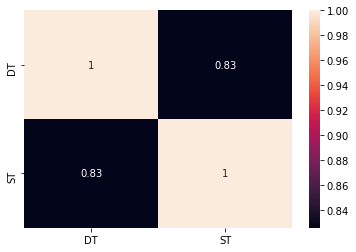

In [85]:
sn.heatmap(df, annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Delivery Time BOX PLOT')

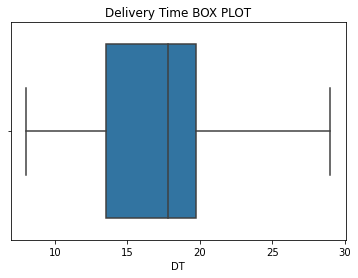

In [86]:
sns.boxplot(data['DT']).set_title('Delivery Time BOX PLOT')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sorting Time BOX PLOT')

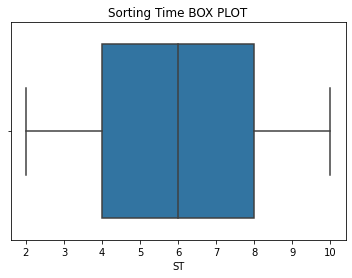

In [87]:
sns.boxplot(data['ST']).set_title('Sorting Time BOX PLOT')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

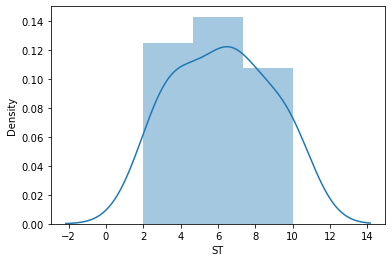

In [88]:
import seaborn as sns
sns.distplot(data['ST'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

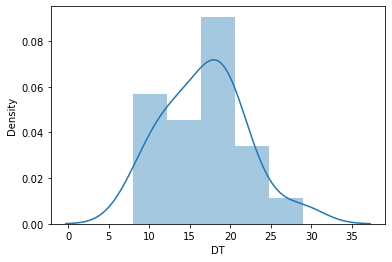

In [89]:
import seaborn as sns
sns.distplot(data['DT'])

Fitting a Linear Regression Model

In [90]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data).fit()

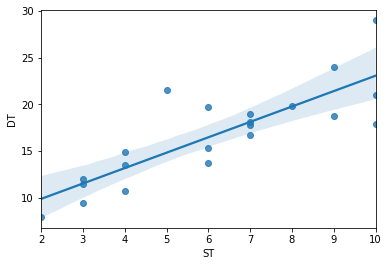

In [91]:
sns.regplot(x="ST", y="DT", data=data);

In [92]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [93]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [94]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Predict for new data point

In [95]:
newdata=pd.Series([200,300])

In [96]:
newdata

0    200
1    300
dtype: int64

In [97]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [98]:
data_pred

,ST
0,200
1,300


In [99]:
model.predict(data_pred)

0    336.386713
1    501.288703
dtype: float64